# **How to prevent Overfitting and Underfitting**

##Preventing Overfitting:

**1. Using Cross validation:**

Cross validation is a very powerful preventive measure against overfitting, with a clever idea. Create multiple mini train-validation splits within the original train data, and use these to tune your model.

We have a standard way of doing so, called the “k-fold cross validation”. What we do here is, partition the dataset into k subsets which we call “folds”.

Then we iteratively train our model on k – 1 folds. Why? We keep the last one as a validation dataset. The last fold is called the “holdout fold”.

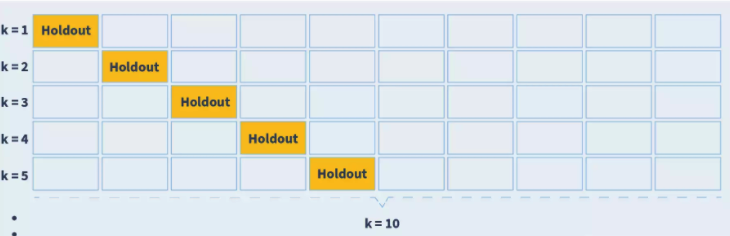



Using cross validation, you can tune your hyperparameters only with your original training dataset. This way, you can keep the validation set as a completely unseen dataset.

K-fold cross validation might not completely remove the overfitting, so we can change the folds every now and then, or use multiple k-fold cross validations together.

**2. Train with more data:**

The signal will be better detected by the algorithm if we train the model with more data. Although it doesn’t work every time, for example if we just add more noisy data, then this technique won’t help.

**3. Remove Features**

In algorithms that don’t have a built-in feature selection, their generalization can be manually improved by removing some irrelevant or unimportant features. Why is removing features helpful? Sometimes it may happen that the model may fail to generalize simply because the model missed the patterns that should have been detected, and the data was too complex for the same.

**4. Add Regularization:**

As we discussed earlier, that overfitting could be a consequence of the model being too complex. Can we forcefully make it simpler? Yes! Regularization is the term for a range of techniques that could be used to force your model into being simpler. The techniques used to regularize any model will depend on the model itself. For example, an option could be pruning a decision tree, on neural networks you could use a dropout, or, to the cost function in regression, a penalty parameter could be added. Confusing terms eh? Google them!



# using K- fold cross vaildation (method 1)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
df_pima=pd.read_csv('pima-indians-diabetes+%281%29.csv')
df_pima

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
X_pima=df_pima.iloc[:,:-1]
X_pima


,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [4]:
y_pima=df_pima['class']
y_pima

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [5]:
kfold=KFold(n_splits=50, random_state=7, shuffle=True)
model=LogisticRegression()
results=cross_val_score(model,X_pima,y_pima,cv=kfold)
print(results)
print('\nAccuracy: {:.2f}%\nStandard deviation: {:.2f}%'. format(np.mean(results)*100,np.std(results)*100))

[0.6875     0.8125     0.8125     0.9375     0.875      0.625
 0.8125     0.875      0.625      0.625      0.875      0.75
 0.75       0.8125     0.625      0.875      0.9375     0.875
 0.6        0.73333333 0.86666667 0.73333333 0.86666667 0.73333333
 0.86666667 0.73333333 0.8        0.86666667 0.66666667 0.73333333
 0.4        0.66666667 0.6        0.93333333 0.73333333 0.8
 0.8        0.8        0.66666667 0.93333333 0.8        1.
 0.66666667 0.93333333 0.66666667 0.73333333 0.8        0.8
 0.66666667 0.66666667]

Accuracy: 76.91%
Standard deviation: 11.54%


# Accuracy lies between 65.37% (76.91-11.54) to 88.45% (76.91+11.54)

In [6]:
model=LogisticRegression()
results=cross_val_score(model,X_pima,y_pima,cv=50)
print(results)
print('\nAccuracy: {:.2f}%\nStandard deviation: {:.2f}%'. format(np.mean(results)*100,np.std(results)*100))

[0.75       0.5        0.6875     0.8125     0.8125     0.8125
 0.875      0.75       0.875      0.625      1.         0.75
 0.8125     0.5625     0.9375     0.8125     0.625      0.5625
 0.66666667 0.8        0.6        0.73333333 0.8        0.86666667
 0.86666667 0.73333333 0.8        0.86666667 0.66666667 0.8
 0.6        0.8        0.86666667 0.86666667 0.73333333 0.73333333
 0.73333333 0.86666667 1.         0.73333333 0.66666667 0.93333333
 0.73333333 0.6        0.8        0.8        0.66666667 0.93333333
 0.93333333 0.73333333]

Accuracy: 76.99%
Standard deviation: 11.46%


<br>


# Identify Overfitting in Our Dataset(method 2)

In [7]:
df = pd.read_csv('fruit_dataset.csv')

In [8]:
df.head(50)

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79
5,2,mandarin,80,5.8,4.3,0.77
6,2,mandarin,80,5.9,4.3,0.81
7,2,mandarin,76,5.8,4.0,0.81
8,1,apple,178,7.1,7.8,0.92
9,1,apple,172,7.4,7.0,0.89


In [9]:
df['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
mango        2
Name: fruit_name, dtype: int64

In [10]:
df['fruit_label'].value_counts()

1    19
3    19
4    16
2     5
5     2
Name: fruit_label, dtype: int64

In [11]:
x = df.iloc[:,2:5]
y= df.iloc[:,0]

In [12]:
print(x)
print(y)

    mass  width  height
0    192    8.4    7.30
1    180    8.0    6.80
2    176    7.4    7.20
3     86    6.2    4.70
4     84    6.0    4.60
..   ...    ...     ...
56   116    5.9    8.10
57   152    6.5    8.50
58   118    6.1    8.10
59   201    7.7   10.10
60   209    8.1   12.11

[61 rows x 3 columns]
0     1
1     1
2     1
3     2
4     2
     ..
56    4
57    4
58    4
59    5
60    5
Name: fruit_label, Length: 61, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = .20, random_state=1)



In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [15]:
from sklearn import metrics


print('training score: ',lr.score(x_train,y_train))
print('test score: ',lr.score(x_test,y_test))

training score:  0.7291666666666666
test score:  0.46153846153846156


In [16]:
df['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
mango        2
Name: fruit_name, dtype: int64

## **Solving Overfitting in Our Dataset** : method(2):Train with more data

##Resampling Techniques

We can change the dataset that we are using to build our predictive model to have more balanced data.

This approach is normally referred to as sampling the dataset. There are two main methods that are typically used.


1. **Upsampling/OverSampling**
2. **DownSampling/UnderSampling**

Since our dataset is small and we want to increase it we will use *Upsampling/OverSampling* techique:

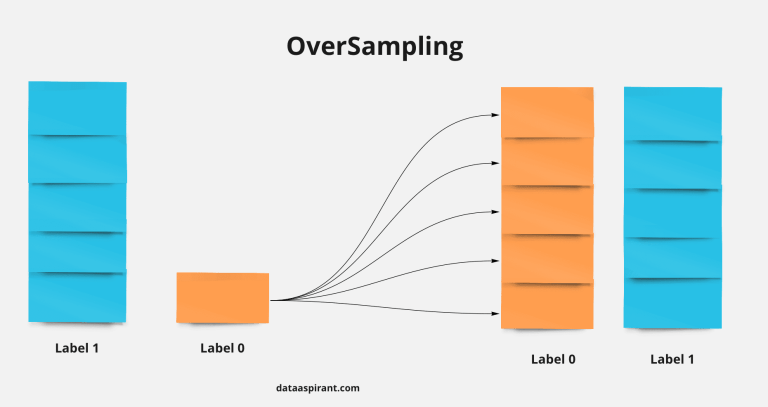

####Upsample Mandarin

In [17]:
df[df['fruit_label']==2]

,fruit_label,fruit_name,mass,width,height,color_score
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79
5,2,mandarin,80,5.8,4.3,0.77
6,2,mandarin,80,5.9,4.3,0.81
7,2,mandarin,76,5.8,4.0,0.81


In [18]:
df[df.fruit_label==1]

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
8,1,apple,178,7.1,7.8,0.92
9,1,apple,172,7.4,7.0,0.89
10,1,apple,166,6.9,7.3,0.93
11,1,apple,172,7.1,7.6,0.92
12,1,apple,154,7.0,7.1,0.88
13,1,apple,164,7.3,7.7,0.70
14,1,apple,152,7.6,7.3,0.69


In [19]:

# separate minority and majority classes
from sklearn.utils import resample

mandarin = df[df.fruit_label==2]
apple = df[df.fruit_label==1]

# upsample minority
mandarin_data_upsampled = resample(mandarin,
                          replace=True, # sample with replacement
                          n_samples= len(apple)-5,    #len(apple), # match number in majority class
                          random_state=67) # reproducible results

In [20]:
mandarin_data_upsampled

,fruit_label,fruit_name,mass,width,height,color_score
6,2,mandarin,80,5.9,4.3,0.81
5,2,mandarin,80,5.8,4.3,0.77
4,2,mandarin,84,6.0,4.6,0.79
4,2,mandarin,84,6.0,4.6,0.79
6,2,mandarin,80,5.9,4.3,0.81
6,2,mandarin,80,5.9,4.3,0.81
4,2,mandarin,84,6.0,4.6,0.79
6,2,mandarin,80,5.9,4.3,0.81
3,2,mandarin,86,6.2,4.7,0.80
6,2,mandarin,80,5.9,4.3,0.81


In [21]:
mandarin_data_upsampled = mandarin_data_upsampled.reset_index(drop=True)


In [22]:
mandarin_data_upsampled

,fruit_label,fruit_name,mass,width,height,color_score
0,2,mandarin,80,5.9,4.3,0.81
1,2,mandarin,80,5.8,4.3,0.77
2,2,mandarin,84,6.0,4.6,0.79
3,2,mandarin,84,6.0,4.6,0.79
4,2,mandarin,80,5.9,4.3,0.81
5,2,mandarin,80,5.9,4.3,0.81
6,2,mandarin,84,6.0,4.6,0.79
7,2,mandarin,80,5.9,4.3,0.81
8,2,mandarin,86,6.2,4.7,0.80
9,2,mandarin,80,5.9,4.3,0.81


In [23]:
Frame =[df,mandarin_data_upsampled]

df = pd.concat(Frame,axis = 0)

df

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79
...,...,...,...,...,...,...
9,2,mandarin,80,5.9,4.3,0.81
10,2,mandarin,76,5.8,4.0,0.81
11,2,mandarin,84,6.0,4.6,0.79
12,2,mandarin,80,5.8,4.3,0.77


In [24]:
df.tail(50)

,fruit_label,fruit_name,mass,width,height,color_score
25,3,orange,356,9.2,9.20,0.75
26,3,orange,362,9.6,9.20,0.74
27,3,orange,204,7.5,9.20,0.77
28,3,orange,140,6.7,7.10,0.72
29,3,orange,160,7.0,7.40,0.81
30,3,orange,158,7.1,7.50,0.79
31,3,orange,210,7.8,8.00,0.82
32,3,orange,164,7.2,7.00,0.80
33,3,orange,190,7.5,8.10,0.74
34,3,orange,142,7.6,7.80,0.75


In [25]:
df['fruit_name'].value_counts()

apple       19
mandarin    19
orange      19
lemon       16
mango        2
Name: fruit_name, dtype: int64

In [26]:

# separate minority and majority classes
from sklearn.utils import resample

mango = df[df.fruit_label==5]
apple = df[df.fruit_label==1]

# upsample minority
mango_data_upsampled = resample(mango,
                          replace=True, # sample with replacement
                          n_samples= len(apple)-2,    #len(apple), # match number in majority class
                          random_state=67) # reproducible results

In [27]:
mango_data_upsampled

,fruit_label,fruit_name,mass,width,height,color_score
60,5,mango,209,8.1,12.11,0.78
60,5,mango,209,8.1,12.11,0.78
59,5,mango,201,7.7,10.10,0.71
60,5,mango,209,8.1,12.11,0.78
60,5,mango,209,8.1,12.11,0.78
60,5,mango,209,8.1,12.11,0.78
60,5,mango,209,8.1,12.11,0.78
60,5,mango,209,8.1,12.11,0.78
60,5,mango,209,8.1,12.11,0.78
59,5,mango,201,7.7,10.10,0.71


In [28]:
mango_data_upsampled = mango_data_upsampled.reset_index(drop=True)

In [29]:
mango_data_upsampled

,fruit_label,fruit_name,mass,width,height,color_score
0,5,mango,209,8.1,12.11,0.78
1,5,mango,209,8.1,12.11,0.78
2,5,mango,201,7.7,10.10,0.71
3,5,mango,209,8.1,12.11,0.78
4,5,mango,209,8.1,12.11,0.78
5,5,mango,209,8.1,12.11,0.78
6,5,mango,209,8.1,12.11,0.78
7,5,mango,209,8.1,12.11,0.78
8,5,mango,209,8.1,12.11,0.78
9,5,mango,201,7.7,10.10,0.71


In [30]:
Frame =[df,mango_data_upsampled]

df = pd.concat(Frame,axis = 0)

df

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.30,0.55
1,1,apple,180,8.0,6.80,0.59
2,1,apple,176,7.4,7.20,0.60
3,2,mandarin,86,6.2,4.70,0.80
4,2,mandarin,84,6.0,4.60,0.79
...,...,...,...,...,...,...
12,5,mango,209,8.1,12.11,0.78
13,5,mango,209,8.1,12.11,0.78
14,5,mango,201,7.7,10.10,0.71
15,5,mango,209,8.1,12.11,0.78


In [31]:
df['fruit_name'].value_counts()

apple       19
mandarin    19
orange      19
mango       19
lemon       16
Name: fruit_name, dtype: int64

In [32]:
x = df.iloc[:,2:5]
y= df.iloc[:,0]

In [33]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = .20, random_state=1)



In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
from sklearn import metrics


print('training score: ',lr.score(x_train,y_train))
print('test score: ',lr.score(x_test,y_test))

training score:  0.7671232876712328
test score:  0.7894736842105263


## Solving Overfitting in Our Dataset :method(4):Regularization

In [36]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [37]:
creditData = pd.read_csv("credit.csv")
creditData.head(10) #several missing values!

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [38]:
creditData.shape

(1000, 17)

In [39]:
creditData.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [40]:
for feature in creditData.columns: # Loop through all columns in the dataframe
    if creditData[feature].dtype == 'object': # Only apply for columns with categorical strings
        creditData[feature] = pd.Categorical(creditData[feature])# Replace strings with an integer
creditData.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [41]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

In [42]:
print(creditData.checking_balance.value_counts())
print('-'*50)
print(creditData.credit_history.value_counts())
print('-'*50)
print(creditData.purpose.value_counts())
print('-'*50)
print(creditData.savings_balance.value_counts())
print('-'*50)
print(creditData.employment_duration.value_counts())
print('-'*50)
print(creditData.other_credit.value_counts())
print('-'*50)
print(creditData.housing.value_counts())
print('-'*50)
print(creditData.job.value_counts())
print('-'*50)
print(creditData.phone.value_counts())


unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
--------------------------------------------------
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
--------------------------------------------------
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
--------------------------------------------------
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
--------------------------------------------------
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
--------------------------------------------------
none     814
bank     139
store     47
Name:

In [43]:
#those features with order in their categories 

replaceStruct = {
                "checking_balance":     {"< 0 DM": 1, "1 - 200 DM": 2 ,"> 200 DM": 3 ,"unknown":-1},
                "credit_history": {"critical": 1, "poor":2 , "good": 3, "very good": 4,"perfect": 5},
                 "savings_balance": {"< 100 DM": 1, "100 - 500 DM":2 , "500 - 1000 DM": 3, "> 1000 DM": 4,"unknown": -1},
                 "employment_duration":     {"unemployed": 1, "< 1 year": 2 ,"1 - 4 years": 3 ,"4 - 7 years": 4 ,"> 7 years": 5},
                "phone":     {"no": 1, "yes": 2 },
                #"job":     {"unemployed": 1, "unskilled": 2, "skilled": 3, "management": 4 },
                "default":     {"no": 0, "yes": 1 } 
                    }


#those features with NO order in their categories                   
oneHotCols=["purpose","housing","other_credit","job"]


In [44]:
creditData=creditData.replace(replaceStruct)
creditData=pd.get_dummies(creditData, columns=oneHotCols)
creditData.head(10)


,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
5,-1,36,3,9055,-1,3,2,4,35,1,...,1,0,0,0,1,0,0,0,0,1
6,-1,24,3,2835,3,5,3,4,53,1,...,0,1,0,0,1,0,0,1,0,0
7,2,36,3,6948,1,3,2,2,35,1,...,0,0,1,0,1,0,1,0,0,0
8,-1,12,3,3059,4,4,2,4,61,1,...,0,1,0,0,1,0,0,0,0,1
9,2,30,1,5234,1,1,4,2,28,2,...,0,1,0,0,1,0,1,0,0,0


In [45]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   checking_balance              1000 non-null   category
 1   months_loan_duration          1000 non-null   int64   
 2   credit_history                1000 non-null   category
 3   amount                        1000 non-null   int64   
 4   savings_balance               1000 non-null   category
 5   employment_duration           1000 non-null   category
 6   percent_of_income             1000 non-null   int64   
 7   years_at_residence            1000 non-null   int64   
 8   age                           1000 non-null   int64   
 9   existing_loans_count          1000 non-null   int64   
 10  dependents                    1000 non-null   int64   
 11  phone                         1000 non-null   category
 12  default                       1000 non-null   cat

In [46]:
creditData.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0


In [47]:
X = creditData.drop("default" , axis=1)
y = creditData.pop("default")

In [48]:
X

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1,12,3,1736,1,4,3,4,31,1,...,0,1,0,0,1,0,0,0,0,1
996,1,30,3,3857,1,3,4,4,40,1,...,0,1,0,0,1,0,1,0,0,0
997,-1,12,3,804,1,5,4,4,38,1,...,0,1,0,0,1,0,0,1,0,0
998,1,45,3,1845,1,3,4,4,23,1,...,1,0,0,0,1,0,0,1,0,0


In [49]:
y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: default, Length: 1000, dtype: category
Categories (2, int64): [0, 1]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [51]:
print('X_train and shape: \n{} \n\n{}\n\n X_test and shape:\n {} \n\n {}\n\n y_train and shape:\n{} \n\n {}\n\n y_test and shape:\n{} \n\n{}\n'.format(X_train,X_train.shape,X_test,X_test.shape,y_train,y_train.shape,y_test,y_test.shape))

X_train and shape: 
    checking_balance  months_loan_duration credit_history  amount  \
731                1                    24              3    1987   
716               -1                    30              1    3077   
640                1                    18              3     750   
804                2                    12              3    7472   
737                1                    18              3    4380   
..               ...                   ...            ...     ...   
767               -1                    10              3    2901   
72                 1                     8              1    1164   
908               -1                    15              2    3594   
235                1                    24              3    1823   
37                 3                    18              3    2100   

    savings_balance employment_duration  percent_of_income  \
731               1                   3                  2   
716              -1        

In [52]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [53]:
print('Training data score:{} '.format(dTree.score(X_train, y_train)))
print('Training data is overfitting')
print('Test data score:{} '. format(dTree.score(X_test, y_test)))


Training data score:1.0 
Training data is overfitting
Test data score:0.6933333333333334 


## Prunning: Reducing over fitting (Regularization)

In [54]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print('Train data score:{} '.format(dTreeR.score(X_train, y_train)))
print('Test data score:{} '.format(dTreeR.score(X_test, y_test)))

Train data score:0.7528571428571429 
Test data score:0.7433333333333333 


## Solving Overfitting in Our Dataset : method(3):Remove features

In [55]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

pd.DataFrame(dTreeR.feature_importances_, columns = ["Importance"], index = X_train.columns)

,Importance
checking_balance,0.492510
months_loan_duration,0.169806
credit_history,0.166109
amount,0.000000
savings_balance,0.064467
employment_duration,0.000000
percent_of_income,0.000000
years_at_residence,0.000000
age,0.000000
existing_loans_count,0.000000


In [56]:
new_creditData = creditData[['checking_balance','months_loan_duration','credit_history','savings_balance','purpose_business','other_credit_none']]

In [57]:
new_creditData.head()

,checking_balance,months_loan_duration,credit_history,savings_balance,purpose_business,other_credit_none
0,1,6,1,-1,0,1
1,2,48,3,1,0,1
2,-1,12,1,1,0,1
3,1,42,3,1,0,1
4,1,24,2,1,0,1


In [58]:
X = new_creditData
X

,checking_balance,months_loan_duration,credit_history,savings_balance,purpose_business,other_credit_none
0,1,6,1,-1,0,1
1,2,48,3,1,0,1
2,-1,12,1,1,0,1
3,1,42,3,1,0,1
4,1,24,2,1,0,1
...,...,...,...,...,...,...
995,-1,12,3,1,0,1
996,1,30,3,1,0,1
997,-1,12,3,1,0,1
998,1,45,3,1,0,1


In [59]:
y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: default, Length: 1000, dtype: category
Categories (2, int64): [0, 1]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [61]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [62]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))


0.8857142857142857
0.7166666666666667


## Removing features will reduce over fitting 

<br>

<br>




# **Preventing Underfitting:**

**1. Increasing the Complexity of the model:**

A probable cause of underfitting could be the fact that the model is not complex enough to understand the underlying patterns in data. Making the switch to say, a non-linear model from a linear model or, say, by adding more hidden layers to your existing neural network could be ways to make the model more complex, and in turn could help in removal of underfitting.

**2. Reducing Regularization:**

Well, underfitting is somewhat close to the opposite of overfitting. So, as we read earlier, regularization could help solve the overfitting problem, then reducing it could solve the underfitting problem! Some of the algorithms you use by default include some regularization parameters meant to suppress overfitting. Sometimes, these could also cause hindrance in the learning of the algorithm. Decreasing their values for the most part, makes a difference. You must be thinking, that if underfitting is almost the opposite of overfitting, then maybe adding more features or data would help solve the problem? NO! If the dataset lacks features that are decisive, and important that could help your model in detecting patterns, you can multiply the training data set by 2 or 5, or even 10, but it will not help in making your algorithm better. It is a common notion to think that throwing more data would solve the problem, but as stated earlier, it might just jeopardize the project.

## Solving Underfitting in Our Dataset : method(1):Increase complexity of the model

In [63]:
weather_data_p = pd.read_csv('WeatherDataP.csv')
weather_data_p

,Pressure (millibars),Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83
5,1014.52,0.85
6,1014.16,0.83
7,1014.24,0.78
8,1014.25,0.72
9,1013.96,0.61


In [64]:
x = weather_data_p[['Pressure (millibars)']]
y = weather_data_p.Humidity

In [65]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train,y_test =train_test_split(x,y, test_size=.20, random_state=1)



In [66]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [67]:
from sklearn import metrics

print('training score: ',lr.score(x_train,y_train))
print('test score: ',lr.score(x_test,y_test))

training score:  0.29065760334760526
test score:  0.14324706577023627


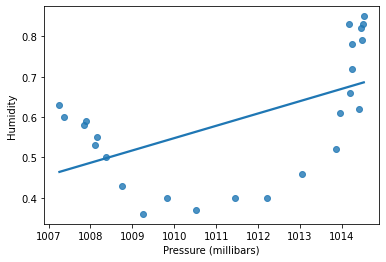

In [68]:
import seaborn as sns

sns.regplot(x,y,ci =None)
plt.show()

  our dataset is not linear so linear regression is not fitting well.

#Increase the model Complexity

We will move from just linear features to Polynomial features.

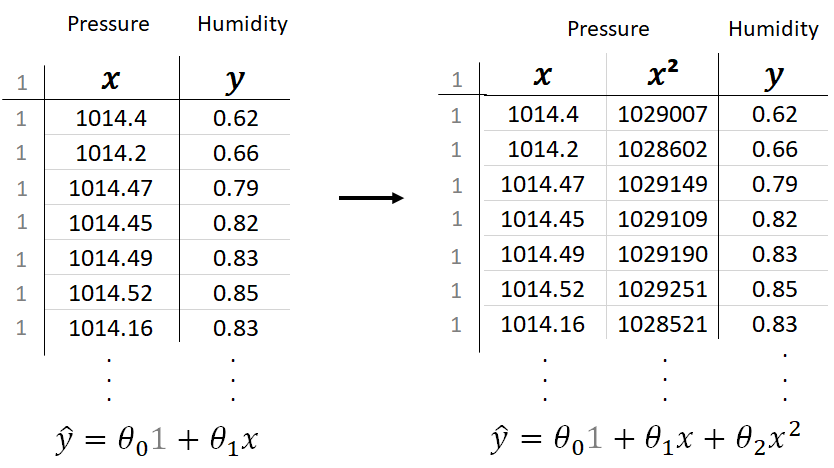

Notice that there is a hidden column of 1’s which can be thought of as the variable associated with θ₀. Since θ₀ × 1 = θ₀ this is often left out.

In [69]:
from sklearn.preprocessing import PolynomialFeatures

pre_process = PolynomialFeatures(degree = 2)

x_poly = pre_process.fit_transform(x)

x_poly

array([[1.00000000e+00, 1.01440000e+03, 1.02900736e+06],
       [1.00000000e+00, 1.01420000e+03, 1.02860164e+06],
       [1.00000000e+00, 1.01447000e+03, 1.02914938e+06],
       [1.00000000e+00, 1.01445000e+03, 1.02910880e+06],
       [1.00000000e+00, 1.01449000e+03, 1.02918996e+06],
       [1.00000000e+00, 1.01452000e+03, 1.02925083e+06],
       [1.00000000e+00, 1.01416000e+03, 1.02852051e+06],
       [1.00000000e+00, 1.01424000e+03, 1.02868278e+06],
       [1.00000000e+00, 1.01425000e+03, 1.02870306e+06],
       [1.00000000e+00, 1.01396000e+03, 1.02811488e+06],
       [1.00000000e+00, 1.01385000e+03, 1.02789182e+06],
       [1.00000000e+00, 1.01304000e+03, 1.02625004e+06],
       [1.00000000e+00, 1.01222000e+03, 1.02458933e+06],
       [1.00000000e+00, 1.01144000e+03, 1.02301087e+06],
       [1.00000000e+00, 1.01052000e+03, 1.02115067e+06],
       [1.00000000e+00, 1.00983000e+03, 1.01975663e+06],
       [1.00000000e+00, 1.00926000e+03, 1.01860575e+06],
       [1.00000000e+00, 1.00876

In [70]:
df_x_poly = pd.DataFrame(x_poly)
df_x_poly.columns = ['1','x','x_squared']
df_x_poly

,1,x,x_squared
0,1.0,1014.40,1.029007e+06
1,1.0,1014.20,1.028602e+06
2,1.0,1014.47,1.029149e+06
3,1.0,1014.45,1.029109e+06
4,1.0,1014.49,1.029190e+06
5,1.0,1014.52,1.029251e+06
6,1.0,1014.16,1.028521e+06
7,1.0,1014.24,1.028683e+06
8,1.0,1014.25,1.028703e+06
9,1.0,1013.96,1.028115e+06


#### **Implementing Polynomial Regression**

The method here remains the same as multiple linear regression in python, but here we are fitting our regression model on the polynomial features.

In [71]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train,y_test =train_test_split(x_poly,y, test_size=.20, random_state=1)


In [72]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [73]:
y_pred = lr.predict(x_poly)
y_pred
df_y_pred=pd.DataFrame(y_pred, columns=['Humidity'])
df_y_pred

,Humidity
0,0.751209
1,0.707624
2,0.767026
3,0.762477
4,0.771598
5,0.778502
6,0.699193
7,0.716151
8,0.718298
9,0.658461


In [74]:
from sklearn import metrics

print('training score: ',lr.score(x_train,y_train))
print('test score: ',lr.score(x_test,y_test))

training score:  0.821262219719311
test score:  0.9427391324386682


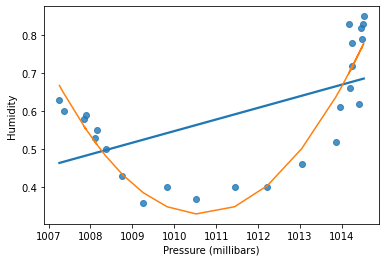

In [75]:
import seaborn as sns

sns.regplot(x,y,fit_reg=True, ci = None)
plt.plot(x.iloc[:,0],y_pred)
plt.show()